In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monitor_your_balance.csv')

In [3]:
df.dropna(axis=1, how='all', inplace=True)

In [4]:
df

,timestamp,total,USDT
0,1.669827e+09,133.975765,USDT
1,1.669827e+09,134.028890,USDT
2,1.669827e+09,134.029878,USDT
3,1.669828e+09,134.043910,USDT
4,1.669828e+09,134.058642,USDT
...,...,...,...
475,1.670095e+09,135.022027,USDT
476,1.670095e+09,135.033305,USDT
477,1.670096e+09,134.996707,USDT
478,1.670096e+09,134.944532,USDT


In [5]:
hours = 24
now = datetime.now()
back = now - timedelta(hours=hours)
back_timestamp = int(back.timestamp())
print(f'now: {now} minus hours: {hours} is back time: {back}\nback timestamp is {back_timestamp}')

now: 2022-12-03 20:55:28.474615 minus hours: 24 is back time: 2022-12-02 20:55:28.474615
back timestamp is 1670010928


In [6]:
df = df[df.timestamp>back_timestamp]

In [7]:
df['date_time'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('date_time')
columns =['total']
df = df[columns]

C:\Users\Romek\AppData\Local\Temp\ipykernel_3568\3716461246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['timestamp'], unit='s')


<AxesSubplot:xlabel='date_time'>

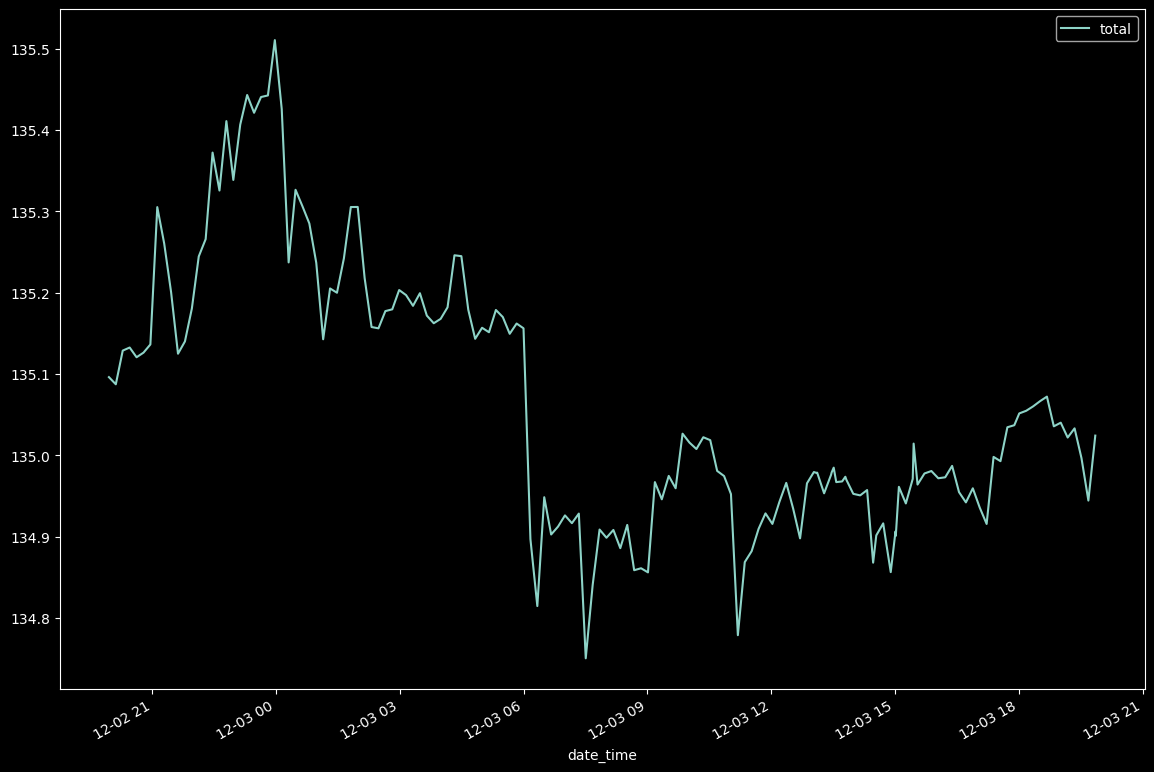

In [8]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (14, 10)
df.plot()